In [ ]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset='all')

In [ ]:
news.DESCR

'.. _20newsgroups_dataset:\n\nThe 20 newsgroups text dataset\n------------------------------\n\nThe 20 newsgroups dataset comprises around 18000 newsgroups posts on\n20 topics split in two subsets: one for training (or development)\nand the other one for testing (or for performance evaluation). The split\nbetween the train and test set is based upon a messages posted before\nand after a specific date.\n\nThis module contains two loaders. The first one,\n:func:`sklearn.datasets.fetch_20newsgroups`,\nreturns a list of the raw texts that can be fed to text feature\nextractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`\nwith custom parameters so as to extract feature vectors.\nThe second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,\nreturns ready-to-use features, i.e., it is not necessary to use a feature\nextractor.\n\n**Data Set Characteristics:**\n\n    =================   ==========\n    Classes                     20\n    Samples total           

In [ ]:
len(news.data)

18846

In [ ]:
news.target

array([10,  3, 17, ...,  3,  1,  7])

In [ ]:
news.data[15]

'From: dbd@urartu.sdpa.org (David Davidian)\nSubject: "Stretching from the Adriatic Sea to the Great Wall of China"\nOrganization: S.D.P.A. Center for Regional Studies\nLines: 22\n\nIn the following report: _Turkey Eyes Regional Role_ ANKARA, Turkey (AP)\nApril 27, 1993, we find in the last paragraph:\n\n[Turanist] Although Premier Suleyman Demirel criticized Ozal\'s often\n[Turanist] brash calls for more Turkish influence, he also has spoken\n[Turanist] of a swath of Turkic peoples "stretching from the Adriatic\n[Turanist] Sea to the Great Wall of China."\n\nWho does Demirel think he is fooling? It seems at both ends of his envisioned \npan-Turkic Empire -- the Balkans and the Caucasus -- Turkey\'s fascist boasts\nare being pre-empted.\n\nI would suggest Turkey let the world feel some of their "Grey Wolf Teeth", and\nattempt to stretch from the Adriatic to China! Turkey will have cried "wolf"\njust once too much! \n\n\n-- \nDavid Davidian dbd@urartu.sdpa.org   | "Armenia has not learn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [ ]:
import numpy as np
class_pair_list = [("sci.space","sci.med"),("comp.sys.mac.hardware","comp.sys.ibm.pc.hardware"),
                   ("rec.sport.hockey",'rec.sport.baseball')]  
c1,c2 = class_pair_list[2]

newsgroups_valid = fetch_20newsgroups(subset = "test",categories=[c1, c2])
y_valid = newsgroups_valid.target 
                                 
newsgroups_train = fetch_20newsgroups(subset = "train",categories=[c1, c2])
dd = list(newsgroups_train.data)
y_train = list(newsgroups_train.target)
y_train =np.array(y_train)
dd = np.array(dd)
                         
train_features = vectorizer.fit_transform(dd)
test_features = vectorizer.transform(newsgroups_valid.data)

train_targets = np.where(y_train==0,-1,1)  
test_targets = np.where(y_valid==0,-1,1)  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

Naive Baes

In [ ]:
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

t0 = time.time()

classifier = GaussianNB()
classifier.fit(train_features.toarray(), train_targets) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

prediction_training_targets = classifier.predict(train_features.toarray())
self_accuracy = accuracy_score(train_targets, prediction_training_targets)
self_precision = precision_score(train_targets, prediction_training_targets, average='weighted')
self_recall = recall_score(train_targets, prediction_training_targets, average='weighted')
print("Accuracy for training data", self_accuracy)
print("Precision for training data ", self_precision)
print("Recall for training data", self_recall)

print()

prediction_test_targets = classifier.predict(test_features.toarray())
test_accuracy = accuracy_score(test_targets, prediction_test_targets)
test_precision = precision_score(test_targets, prediction_test_targets, average='weighted')
test_recall = recall_score(test_targets, prediction_test_targets, average='weighted')
print("Accuracy for test data:", test_accuracy)
print("Precision for test data ", test_precision)
print("Recall for test data", test_recall)

print()

Время обучения: 0.3867149353027344

Accuracy for training data 1.0
Precision for training data  1.0
Recall for training data 1.0

Accuracy for test data: 0.9434673366834171
Precision for test data  0.9452156234102139
Recall for test data 0.9434673366834171



/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


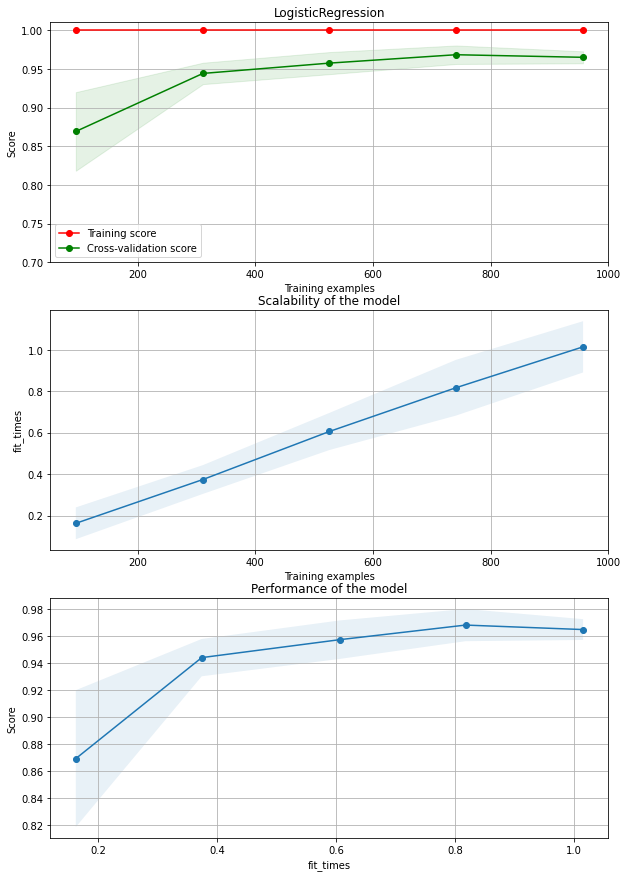

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import ShuffleSplit

fig, axess = plt.subplots(3, 1, figsize=(10, 15))
title = "LogisticRegression"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = GaussianNB()
plot_learning_curve(
    estimator, title, train_features.toarray(), train_targets, axes=axess, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

Logistic Regression

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

t0 = time.time()

classifier = LogisticRegression(solver='liblinear', C=0.005)
classifier.fit(train_features, train_targets) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

prediction_training_targets = classifier.predict(train_features)
self_accuracy = accuracy_score(train_targets, prediction_training_targets)
self_precision = precision_score(train_targets, prediction_training_targets, average='weighted')
self_recall = recall_score(train_targets, prediction_training_targets, average='weighted')
print("Accuracy for training data", self_accuracy)
print("Precision for training data ", self_precision)
print("Recall for training data", self_recall)

print()

prediction_test_targets = classifier.predict(test_features)
test_accuracy = accuracy_score(test_targets, prediction_test_targets)
test_precision = precision_score(test_targets, prediction_test_targets, average='weighted')
test_recall = recall_score(test_targets, prediction_test_targets, average='weighted')
print("Accuracy for test data:", test_accuracy)
print("Precision for test data ", test_precision)
print("Recall for test data", test_recall)

print()

Время обучения: 0.0501093864440918

Accuracy for training data 0.9707602339181286
Precision for training data  0.9710579238443016
Recall for training data 0.9707602339181286

Accuracy for test data: 0.9007537688442211
Precision for test data  0.9035476179984941
Recall for test data 0.9007537688442211



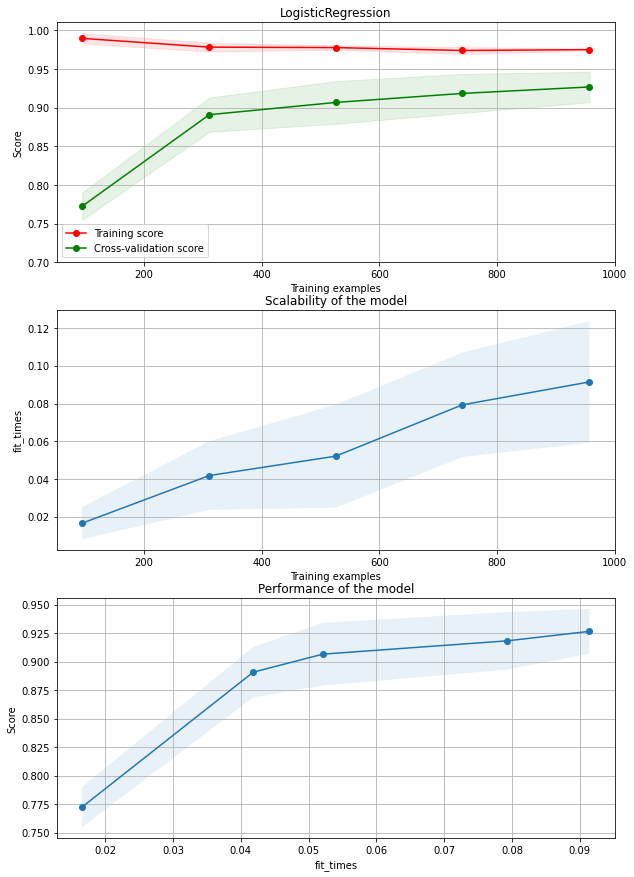

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit

fig, axess = plt.subplots(3, 1, figsize=(10, 15))
title = "LogisticRegression"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = LogisticRegression(solver='liblinear', C=0.005)
plot_learning_curve(
    estimator, title, train_features, train_targets, axes=axess, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

Support vector machine with linear kernel

In [ ]:
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

t0 = time.time()

classifier = SVC(kernel = 'linear')
classifier.fit(train_features, train_targets) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

prediction_training_targets = classifier.predict(train_features)
self_accuracy = accuracy_score(train_targets, prediction_training_targets)
self_precision = precision_score(train_targets, prediction_training_targets, average='weighted')
self_recall = recall_score(train_targets, prediction_training_targets, average='weighted')
print("Accuracy for training data", self_accuracy)
print("Precision for training data ", self_precision)
print("Recall for training data", self_recall)

print()

prediction_test_targets = classifier.predict(test_features)
test_accuracy = accuracy_score(test_targets, prediction_test_targets)
test_precision = precision_score(test_targets, prediction_test_targets, average='weighted')
test_recall = recall_score(test_targets, prediction_test_targets, average='weighted')
print("Accuracy for test data:", test_accuracy)
print("Precision for test data ", test_precision)
print("Recall for test data", test_recall)

print()

Время обучения: 0.6443040370941162

Accuracy for training data 1.0
Precision for training data  1.0
Recall for training data 1.0

Accuracy for test data: 0.9271356783919598
Precision for test data  0.9271473844288203
Recall for test data 0.9271356783919598



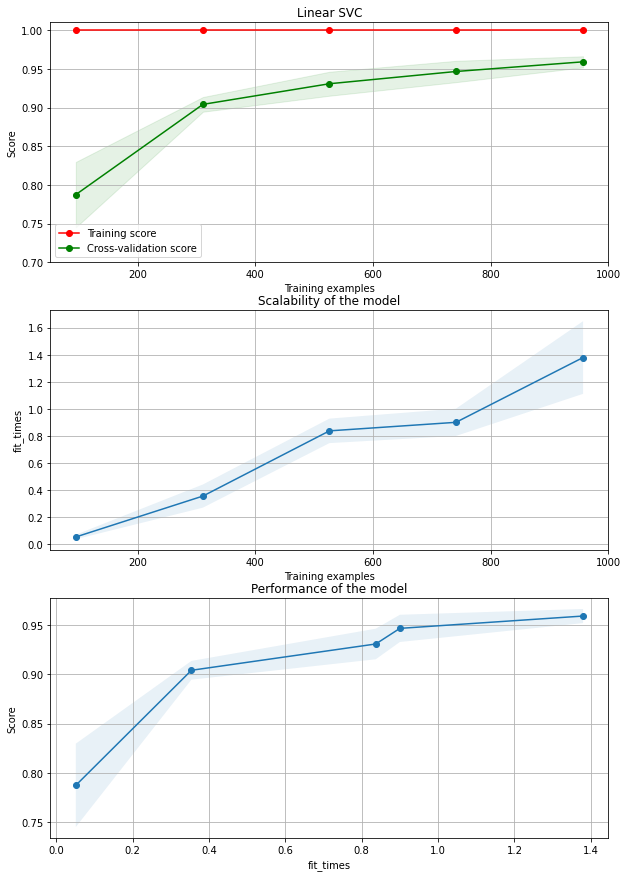

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit

fig, axess = plt.subplots(3, 1, figsize=(10, 15))
title = "Linear SVC"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(kernel = 'linear')
plot_learning_curve(
    estimator, title, train_features, train_targets, axes=axess, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

Support vector machine with polynomial kernel

In [ ]:
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

t0 = time.time()

classifier = SVC(kernel = 'poly')
classifier.fit(train_features, train_targets) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

prediction_training_targets = classifier.predict(train_features)
self_accuracy = accuracy_score(train_targets, prediction_training_targets)
self_precision = precision_score(train_targets, prediction_training_targets, average='weighted')
self_recall = recall_score(train_targets, prediction_training_targets, average='weighted')
print("Accuracy for training data", self_accuracy)
print("Precision for training data ", self_precision)
print("Recall for training data", self_recall)

print()

prediction_test_targets = classifier.predict(test_features)
test_accuracy = accuracy_score(test_targets, prediction_test_targets)
test_precision = precision_score(test_targets, prediction_test_targets, average='weighted')
test_recall = recall_score(test_targets, prediction_test_targets, average='weighted')
print("Accuracy for test data:", test_accuracy)
print("Precision for test data ", test_precision)
print("Recall for test data", test_recall)

print()

Время обучения: 1.8167908191680908

Accuracy for training data 0.6056808688387636
Precision for training data  0.7797862289024714
Recall for training data 0.6056808688387636

Accuracy for test data: 0.535175879396985
Precision for test data  0.6323258428147914
Recall for test data 0.535175879396985



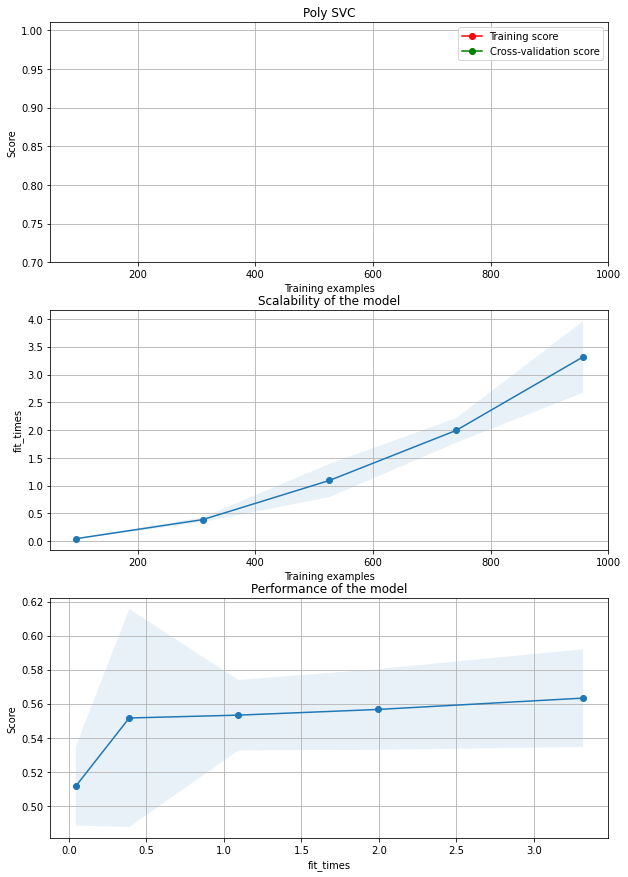

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit

fig, axess = plt.subplots(3, 1, figsize=(10, 15))
title = "Poly SVC"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(kernel = 'poly')
plot_learning_curve(
    estimator, title, train_features, train_targets, axes=axess, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

K nearest neighbors

In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

t0 = time.time()

classifier = KNeighborsClassifier()
classifier.fit(train_features, train_targets) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

prediction_training_targets = classifier.predict(train_features)
self_accuracy = accuracy_score(train_targets, prediction_training_targets)
self_precision = precision_score(train_targets, prediction_training_targets, average='weighted')
self_recall = recall_score(train_targets, prediction_training_targets, average='weighted')
print("Accuracy for training data", self_accuracy)
print("Precision for training data ", self_precision)
print("Recall for training data", self_recall)

print()

prediction_test_targets = classifier.predict(test_features)
test_accuracy = accuracy_score(test_targets, prediction_test_targets)
test_precision = precision_score(test_targets, prediction_test_targets, average='weighted')
test_recall = recall_score(test_targets, prediction_test_targets, average='weighted')
print("Accuracy for test data:", test_accuracy)
print("Precision for test data ", test_precision)
print("Recall for test data", test_recall)

print()

Время обучения: 0.0020732879638671875

Accuracy for training data 0.8922305764411027
Precision for training data  0.8948562458072346
Recall for training data 0.8922305764411027

Accuracy for test data: 0.7160804020100503
Precision for test data  0.7191843237649372
Recall for test data 0.7160804020100503



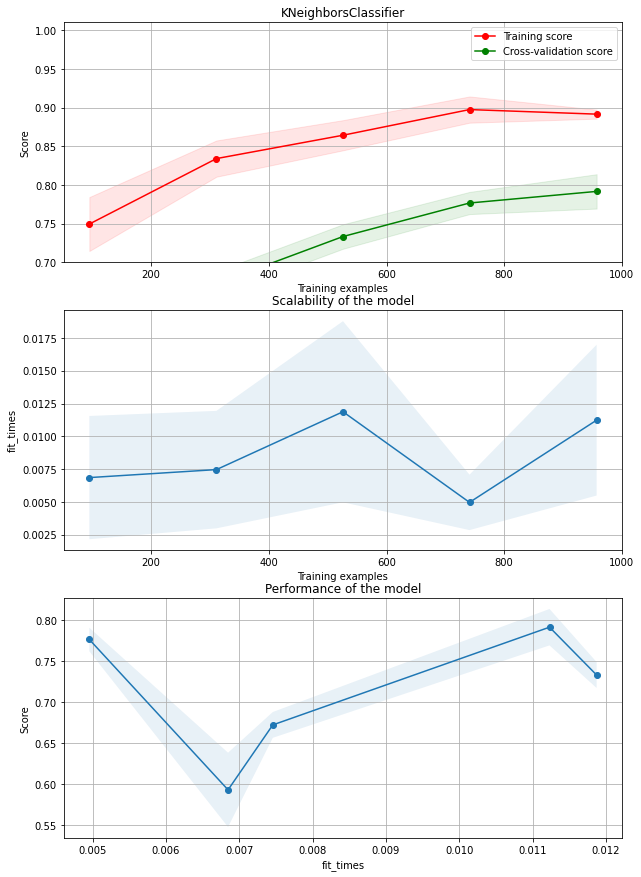

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit

fig, axess = plt.subplots(3, 1, figsize=(10, 15))
title = "KNeighborsClassifier"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = KNeighborsClassifier()
plot_learning_curve(
    estimator, title, train_features, train_targets, axes=axess, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

MLP

In [ ]:
import time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

t0 = time.time()

classifier = MLPClassifier()
classifier.fit(train_features, train_targets) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

prediction_training_targets = classifier.predict(train_features)
self_accuracy = accuracy_score(train_targets, prediction_training_targets)
self_precision = precision_score(train_targets, prediction_training_targets, average='weighted')
self_recall = recall_score(train_targets, prediction_training_targets, average='weighted')
print("Accuracy for training data", self_accuracy)
print("Precision for training data ", self_precision)
print("Recall for training data", self_recall)

print()

prediction_test_targets = classifier.predict(test_features)
test_accuracy = accuracy_score(test_targets, prediction_test_targets)
test_precision = precision_score(test_targets, prediction_test_targets, average='weighted')
test_recall = recall_score(test_targets, prediction_test_targets, average='weighted')
print("Accuracy for test data:", test_accuracy)
print("Precision for test data ", test_precision)
print("Recall for test data", test_recall)

print()

Время обучения: 18.329426527023315

Accuracy for training data 1.0
Precision for training data  1.0
Recall for training data 1.0

Accuracy for test data: 0.9685929648241206
Precision for test data  0.9685961213100678
Recall for test data 0.9685929648241206



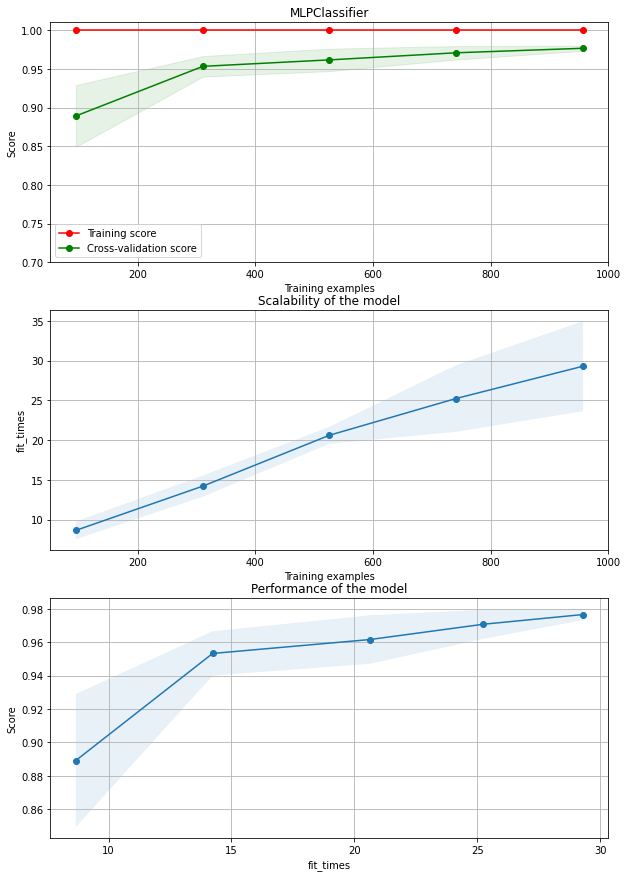

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import ShuffleSplit

fig, axess = plt.subplots(3, 1, figsize=(10, 15))
title = "MLPClassifier"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = MLPClassifier()
plot_learning_curve(
    estimator, title, train_features, train_targets, axes=axess, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

Decision Tree classification

In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

t0 = time.time()

classifier = DecisionTreeClassifier()
classifier.fit(train_features, train_targets) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

prediction_training_targets = classifier.predict(train_features)
self_accuracy = accuracy_score(train_targets, prediction_training_targets)
self_precision = precision_score(train_targets, prediction_training_targets, average='weighted')
self_recall = recall_score(train_targets, prediction_training_targets, average='weighted')
print("Accuracy for training data", self_accuracy)
print("Precision for training data ", self_precision)
print("Recall for training data", self_recall)

print()

prediction_test_targets = classifier.predict(test_features)
test_accuracy = accuracy_score(test_targets, prediction_test_targets)
test_precision = precision_score(test_targets, prediction_test_targets, average='weighted')
test_recall = recall_score(test_targets, prediction_test_targets, average='weighted')
print("Accuracy for test data:", test_accuracy)
print("Precision for test data ", test_precision)
print("Recall for test data", test_recall)

print()

Время обучения: 0.2326819896697998

Accuracy for training data 1.0
Precision for training data  1.0
Recall for training data 1.0

Accuracy for test data: 0.9183417085427136
Precision for test data  0.9200112793737805
Recall for test data 0.9183417085427136



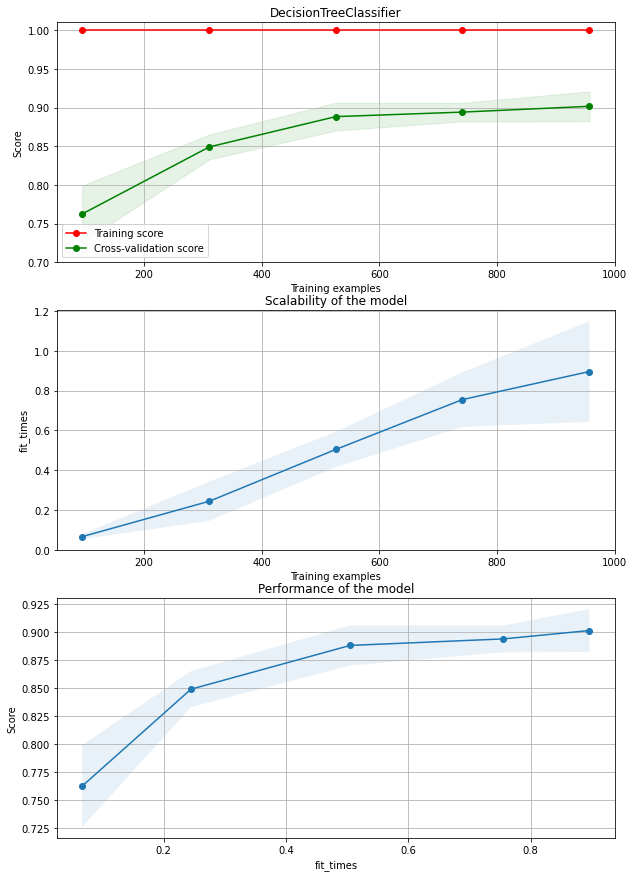

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit

fig, axess = plt.subplots(3, 1, figsize=(10, 15))
title = "DecisionTreeClassifier"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier()
plot_learning_curve(
    estimator, title, train_features, train_targets, axes=axess, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

In [ ]:
import numpy as np

newsgroups_valid = fetch_20newsgroups(subset = "test")
y_valid = newsgroups_valid.target 
                                 
newsgroups_train = fetch_20newsgroups(subset = "train")
dd = list(newsgroups_train.data)
y_train = list(newsgroups_train.target)
y_train =np.array(y_train)
dd = np.array(dd)
                         
train_features = vectorizer.fit_transform(dd)
test_features = vectorizer.transform(newsgroups_valid.data)

train_targets = np.where(y_train==0,-1,1)  
test_targets = np.where(y_valid==0,-1,1)  

In [ ]:
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

t0 = time.time()

classifier = SVC(kernel = 'linear')
classifier.fit(train_features, train_targets) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

prediction_training_targets = classifier.predict(train_features)
self_accuracy = accuracy_score(train_targets, prediction_training_targets)
self_precision = precision_score(train_targets, prediction_training_targets, average='weighted')
self_recall = recall_score(train_targets, prediction_training_targets, average='weighted')
print("Accuracy for training data", self_accuracy)
print("Precision for training data ", self_precision)
print("Recall for training data", self_recall)

print()

prediction_test_targets = classifier.predict(test_features)
test_accuracy = accuracy_score(test_targets, prediction_test_targets)
test_precision = precision_score(test_targets, prediction_test_targets, average='weighted')
test_recall = recall_score(test_targets, prediction_test_targets, average='weighted')
print("Accuracy for test data:", test_accuracy)
print("Precision for test data ", test_precision)
print("Recall for test data", test_recall)

print()

Время обучения: 22.287551641464233

Accuracy for training data 1.0
Precision for training data  1.0
Recall for training data 1.0

Accuracy for test data: 0.9780934678704195
Precision for test data  0.9763770312725908
Recall for test data 0.9780934678704195



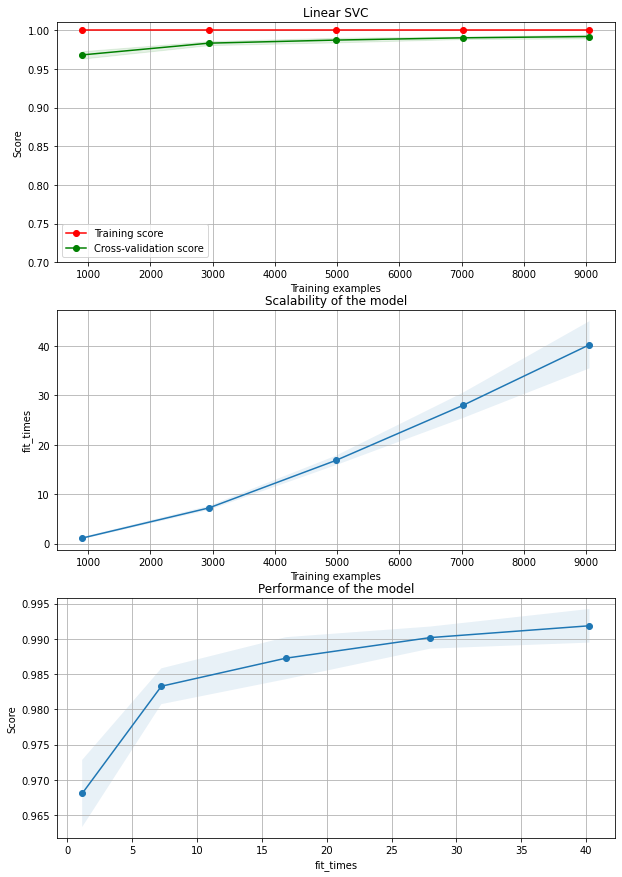

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit

fig, axess = plt.subplots(3, 1, figsize=(10, 15))
title = "Linear SVC"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(kernel = 'linear')
plot_learning_curve(
    estimator, title, train_features, train_targets, axes=axess, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()